In [1]:
import numpy as np
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import requests
from bs4 import BeautifulSoup
from IPython.display import Markdown, display,Image,HTML

### Puzzle as published 
https://www.janestreet.com/puzzles/die-agony-index/

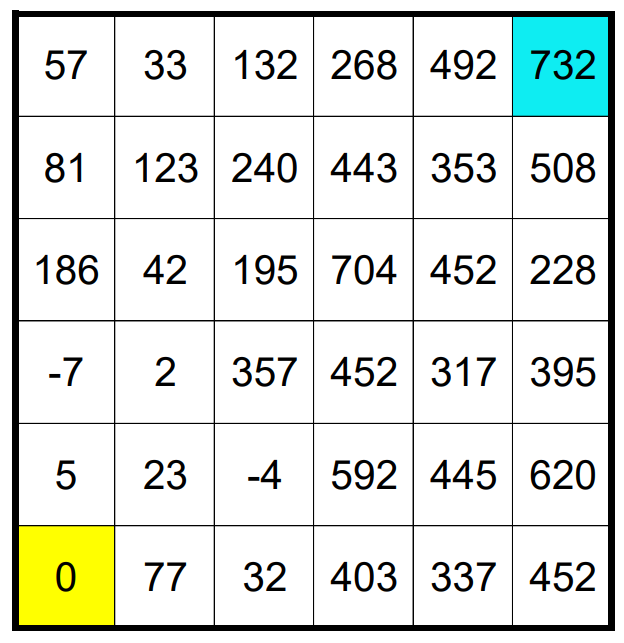

In [2]:
url='https://www.janestreet.com/puzzles/die-agony-index/'
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
tags=soup.findAll('img')
for match in tags:
    match.decompose()

display(Markdown('### Puzzle as published \n'+url))
display(Image('https://www.janestreet.com/puzzles/die-agony.png',width=200))
HTML(str(soup.find_all('div', {'class' :'col-12'})[0])+str(soup.find_all('div', {'class' :'col-12'})[4]))

In [3]:
grid = np.array([
    [57,33,132,268,492,732],
    [81,123,240,443,353,508],
    [186,42,195,704,452,228],
    [-7,2,357,452,317,395],
    [5,23,-4,592,445,620],
    [0,77,32,403,337,452]])

In [4]:
# couple of old functions I used in Travel Agent !

def roll(die,i,j):
    #['bot','frt','lft','rgt','bak','top']
    u = [5,1,3,4,6,2]
    d = [2,6,3,4,1,5]
    l = [3,2,6,1,5,4] 
    r = [4,2,1,6,5,3]
    if i==-1 and j==0:
        return [die[i-1] for i in u]
    elif i == 1 and j==0:
        return [die[i-1] for i in d]
    elif i == 0 and j==1:
        return [die[i-1] for i in l]
    elif i == 0 and j==-1:
        return [die[i-1] for i in r]
    
def neighbours(i,j,N):
    return [[i+x,j+y] for (x,y) in [(-1,0),(0,-1),(1,0),(0,1)] if i+x >= 0 and i+x < N and j+y >= 0 and j+y < N ]

In [5]:
# go through all the possible paths. 

def solve_grid(board):
    dice = [0,0,0,0,0,0]
    N=6
    soln =[]
    brd = np.array(board)
    used = np.ones_like(brd)
    paths = [[brd,dice,used,[0],5,0,0]] #board dice score,x,y,step
    
    while len(paths) > 0:
        brd,d,u,score,x,y,step = paths.pop()
        if x == 0 and y == 5:          
            soln = [brd,u,d,score]
        else:
            for a,b in neighbours(x,y,N):
                new_d = roll(d,a-x,b-y)  
                new_b = np.array(brd)
                new_u = np.array(u)
                if new_d[5] == 0: 
                    test = (new_b[a,b]-score[-1])/(step+1)
                    if test != 0:
                        new_d[5]=test
                        new_u[a,b]=0
                        paths.append([new_b,new_d,new_u,score+[new_b[a,b]],a,b,step+1])

                elif new_d[5] == (new_b[a,b]-score[-1])/(step+1):
                    new_b = np.array(brd)
                    new_u[a,b]=0
                    paths.append([new_b,new_d,new_u,score+[new_b[a,b]],a,b,step+1])
    return soln

In [6]:
a,b,d,s = solve_grid(grid)
print("Solution is {:,.0f}.\nDice is {}.\nPath is {}".format(np.sum(a*b),np.array(d,dtype=int),s))

Solution is 1,935.
Dice is [ 9 -9 -3  9  5  7].
Path is [0, 5, 23, -4, 32, 77, 23, 2, 42, 123, 33, 132, 240, 123, 81, 186, 42, 195, 357, 452, 592, 403, 337, 452, 620, 395, 317, 452, 704, 443, 353, 508, 732]


In [7]:
url='https://www.janestreet.com/puzzles/die-agony-solution/'
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
tags=soup.findAll('img')
for match in tags:
    match.decompose()

display(Markdown('### Solution as published \n'+url))
HTML(str(soup.find_all('div', {'class' :'col-12'})[4]))

### Solution as published 
https://www.janestreet.com/puzzles/die-agony-solution/